### Week-05 Assignment - What's the Weather Like?

In [79]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/rsagu/OneDrive/Documents/launch_code/Data-Science-Assignments/course_material/week_05/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
from api_keys import api_key

#you import a variable named api_key
#the file is called api_keys
#the interpreter assumes its a .py file, so you dont need to specify
#print(api_key)

### Generate Cities List

In [10]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [11]:
# A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's
# happening.

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city = 'st. louis'

#q represents the city
req = requests.get(base_url + f'&q={city}')

#you can play around with the full url in your browser if youre stuck
print(base_url + f'&q={city}')
#create a json output of the data
json_data = req.json()
print(json_data)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=21963e4ae204b832b0e77c94d07fca3a&q=st. louis
{'coord': {'lon': -90.1979, 'lat': 38.6273}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.35, 'feels_like': 78.71, 'temp_min': 75.34, 'temp_max': 81.25, 'pressure': 1017, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 158, 'gust': 4}, 'clouds': {'all': 1}, 'dt': 1634757407, 'sys': {'type': 2, 'id': 2009674, 'country': 'US', 'sunrise': 1634732103, 'sunset': 1634771740}, 'timezone': -18000, 'id': 4407066, 'name': 'St Louis', 'cod': 200}


In [12]:
cities_list = ['denver','st louis','phoenix']

city_weather = {'city':[],
               'lon':[],
               'lat':[],
               'humidity':[],
               'pressure':[],
               'country':[],
               'max temperature':[],
               'wind speed':[],
               'cloudiness':[], 
               'date':[]}

#loop over cities and add data to dictionary
for city in cities_list:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

    try:
        #q represents the city
        req = requests.get(base_url + f'&q={city}')
        
        data = req.json()
        
        #add values to our city_weather dictionary
        city_weather['city'].append(data['name'])
        city_weather['lon'].append(data['coord']['lon'])
        city_weather['lat'].append(data['coord']['lat'])
        city_weather['humidity'].append(data['main']['humidity'])
        city_weather['pressure'].append(data['main']['pressure'])
        city_weather['country'].append(data['sys']['country'])
        city_weather['max temperature'].append(data['main']['temp_max'])
        city_weather['wind speed'].append(data['wind']['speed'])
        city_weather['cloudiness'].append(data['clouds']['all'])
        city_weather['date'].append(data['dt'])
        print("processing " + city)
    except:
        print(city+ " not found")
        pass

processing denver
processing st louis
processing phoenix


In [13]:
city_weather

{'city': ['Denver', 'St Louis', 'Phoenix'],
 'lon': [-104.9847, -90.1979, -112.074],
 'lat': [39.7392, 38.6273, 33.4484],
 'humidity': [30, 60, 32],
 'pressure': [1020, 1017, 1017],
 'country': ['US', 'US', 'US'],
 'max temperature': [67.57, 81.25, 84.65],
 'wind speed': [1.99, 1.99, 1.01],
 'cloudiness': [2, 1, 75],
 'date': [1634757344, 1634757407, 1634757412]}

### Perform API Calls

In [14]:
# Perform a weather check on each city in cities using a series of successive API calls.
city_weather = {'city':[],
               'lon':[],
               'lat':[],
               'humidity':[],
               'pressure':[],
               'country':[],
               'max temperature':[],
               'wind speed':[],
               'cloudiness':[], 
               'date':[]}

#loop over cities and add data to dictionary
i = 1
for city in cities:
    city=city
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(base_url).json()

    try:
        #q represents the city
        req = requests.get(base_url + f'&q={city}')
        data = req.json()
        
        #add values to our city_weather dictionary
        city_weather['city'].append(data['name'])
        city_weather['lon'].append(data['coord']['lon'])
        city_weather['lat'].append(data['coord']['lat'])
        city_weather['humidity'].append(data['main']['humidity'])
        city_weather['pressure'].append(data['main']['pressure'])
        city_weather['country'].append(data['sys']['country'])
        city_weather['max temperature'].append(data['main']['temp_max'])
        city_weather['wind speed'].append(data['wind']['speed'])
        city_weather['cloudiness'].append(data['clouds']['all'])
        city_weather['date'].append(data['dt'])
        i+=1
        print(f"Processing city_num {i}|{city}")
    except:
        print(city+ " not found")
        pass

Processing city_num 2|iskateley
Processing city_num 3|longyearbyen
Processing city_num 4|cherskiy
Processing city_num 5|hobart
Processing city_num 6|albany
Processing city_num 7|mantua
Processing city_num 8|butaritari
Processing city_num 9|kodiak
ahumada not found
Processing city_num 10|cape town
nizhneyansk not found
Processing city_num 11|thompson
Processing city_num 12|jamestown
Processing city_num 13|port elizabeth
ruatoria not found
Processing city_num 14|pacifica
Processing city_num 15|tselinnoye
Processing city_num 16|hithadhoo
Processing city_num 17|ushuaia
Processing city_num 18|valladolid
Processing city_num 19|hermanus
Processing city_num 20|cockburn town
Processing city_num 21|mataura
Processing city_num 22|kansanshi
Processing city_num 23|teya
Processing city_num 24|arraial do cabo
Processing city_num 25|hilo
Processing city_num 26|bluff
Processing city_num 27|puerto ayora
Processing city_num 28|gorontalo
Processing city_num 29|saint-pierre
Processing city_num 30|saint-phi

Processing city_num 232|aklavik
Processing city_num 233|yanam
Processing city_num 234|kralendijk
Processing city_num 235|igrim
Processing city_num 236|shimoda
Processing city_num 237|north bend
Processing city_num 238|cidreira
Processing city_num 239|chuy
Processing city_num 240|deputatskiy
Processing city_num 241|gizo
Processing city_num 242|ranong
Processing city_num 243|port macquarie
Processing city_num 244|islampur
Processing city_num 245|saint-augustin
Processing city_num 246|te anau
Processing city_num 247|kankan
Processing city_num 248|nizwa
Processing city_num 249|tabou
Processing city_num 250|pozo colorado
satitoa not found
Processing city_num 251|nichinan
Processing city_num 252|pinyug
Processing city_num 253|bose
Processing city_num 254|bonthe
Processing city_num 255|bertea
lolua not found
Processing city_num 256|turkistan
Processing city_num 257|aromashevo
Processing city_num 258|nouadhibou
Processing city_num 259|laguna
solovetskiy not found
Processing city_num 260|uperna

Processing city_num 467|lipari
Processing city_num 468|butte
Processing city_num 469|bridgetown
Processing city_num 470|kongolo
Processing city_num 471|havre-saint-pierre
Processing city_num 472|san felipe
Processing city_num 473|rawson
Processing city_num 474|shenzhen
Processing city_num 475|port antonio
Processing city_num 476|erenhot
Processing city_num 477|miyako
Processing city_num 478|cayenne
Processing city_num 479|atbasar
Processing city_num 480|san-pedro
karkaralinsk not found
Processing city_num 481|margate
Processing city_num 482|belaya gora
Processing city_num 483|quatre cocos
bac can not found
Processing city_num 484|zermatt
Processing city_num 485|pacasmayo
Processing city_num 486|kudat
Processing city_num 487|abancay
Processing city_num 488|semey
Processing city_num 489|kupang
Processing city_num 490|lhokseumawe
Processing city_num 491|sangar
Processing city_num 492|narsaq
Processing city_num 493|ust-kishert
Processing city_num 494|plettenberg bay
Processing city_num 495

In [80]:
print(city_weather)

{'city': ['Iskateley', 'Longyearbyen', 'Cherskiy', 'Hobart', 'Albany', 'Province of Mantua', 'Butaritari', 'Saint Paul Harbor', 'Cape Town', 'Thompson', 'Jamestown', 'Port Elizabeth', 'Pacifica', 'Tselinnoye', 'Hithadhoo', 'Ushuaia', 'Valladolid', 'Hermanus', 'Cockburn Town', 'Mataura', 'Kansanshi', 'Teya', 'Arraial do Cabo', 'Hilo', 'Bluff', 'Puerto Ayora', 'Gorontalo', 'Saint-Pierre', 'Saint-Philippe', 'Constitución', 'Camacupa', 'Airai', 'Amapá', 'Carora', 'Arrondissement de Mayenne', 'Ambilobe', 'Ancud', 'San Cristobal', 'Rikitea', 'Busselton', 'Atuona', 'Ponta do Sol', 'San Patricio', 'Acapulco de Juárez', 'Port-Gentil', 'Ribeira Grande', 'Yellowknife', "Severo-Kuril'sk", 'Bhādāsar', 'Salta', 'Hammerfest', 'Oranjestad', 'Nísia Floresta', 'Safaga', 'Port Alfred', 'East London', 'Madang', 'Bayanday', 'Ingham', 'Kapaa', 'Nikolskoye', 'Nantucket', 'Qaanaaq', 'Ostrovnoy', 'Kaitangata', 'Rudnogorsk', 'Vaini', 'George Town', 'Tuktoyaktuk', 'Balabac', 'Pontianak', 'Fairbanks', 'Talaya', '

### Convert Raw Data to DataFrame

In [ ]:
#Convert Raw Data to DataFrame
# (1) Display the DataFrame
# (2) Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [16]:
weather_df = pd.DataFrame(city_weather)
weather_df

,city,lon,lat,humidity,pressure,country,max temperature,wind speed,cloudiness,date
0,Iskateley,53.1512,67.6803,81,1001,RU,29.95,10.89,47,1634757505
1,Longyearbyen,15.6401,78.2186,72,1008,SJ,10.24,11.50,20,1634757505
2,Cherskiy,161.3000,68.7500,100,1013,RU,-5.39,5.55,100,1634757286
3,Hobart,147.3294,-42.8794,87,1019,AU,46.26,6.91,75,1634757303
4,Albany,-73.9662,42.6001,45,1013,US,74.44,1.99,67,1634757289
...,...,...,...,...,...,...,...,...,...,...
539,Awallan,121.9130,17.9244,95,1013,PH,73.96,2.68,13,1634757816
540,Saint-Nazaire,-2.2000,47.2833,78,1002,FR,59.04,29.93,75,1634757817
541,Ichinohe,141.3017,40.2069,89,1012,JP,45.57,10.56,100,1634757818
542,Caconda,15.0667,-13.7333,89,1016,AO,61.54,4.00,100,1634757818


In [17]:
weather_df.to_csv('C:/Users/rsagu/OneDrive/Documents/launch_code/Data-Science-Assignments/course_material/week_05/cities.csv')
weather_df.head()

,city,lon,lat,humidity,pressure,country,max temperature,wind speed,cloudiness,date
0,Iskateley,53.1512,67.6803,81,1001,RU,29.95,10.89,47,1634757505
1,Longyearbyen,15.6401,78.2186,72,1008,SJ,10.24,11.50,20,1634757505
2,Cherskiy,161.3000,68.7500,100,1013,RU,-5.39,5.55,100,1634757286
3,Hobart,147.3294,-42.8794,87,1019,AU,46.26,6.91,75,1634757303
4,Albany,-73.9662,42.6001,45,1013,US,74.44,1.99,67,1634757289


In [ ]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Use matplotlib
#Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

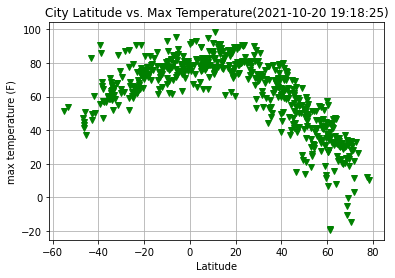

In [81]:
from datetime import datetime
timestamp = city_weather["date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
#shortened_timestamp = datetime.date(converted_timestamp)

fig, ax = plt.subplots()
ax.plot(city_weather['lat'], city_weather['max temperature'], marker = 'v', color = "green", linestyle = 'none')

ax.grid()
ax.set_xlabel('Latitude')
ax.set_ylabel('max temperature (F)')
ax.set_title(f'City Latitude vs. Max Temperature({converted_timestamp})')
plt.savefig('Latitude_Temperature Plot')

plt.show()


#### Latitude vs. Humidity Plot

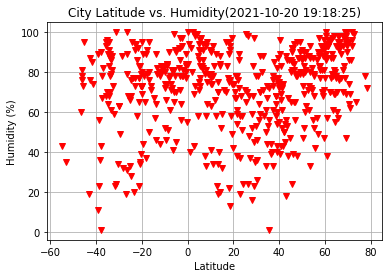

In [74]:
fig, ax = plt.subplots()
ax.plot(city_weather['lat'], city_weather['humidity'], marker = 'v', color = "red", linestyle = 'none')

ax.grid()
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title(f'City Latitude vs. Humidity({converted_timestamp})')
plt.savefig('Latitude_Humidity Plot')

plt.show()


#### Latitude vs. Cloudiness Plot

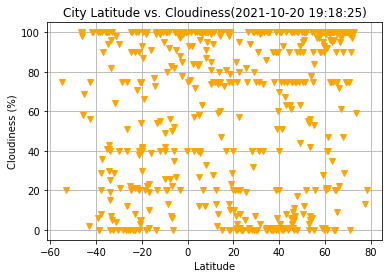

In [75]:
fig, ax = plt.subplots()
ax.plot(city_weather['lat'], city_weather['cloudiness'], marker = 'v', color = "orange", linestyle = 'none')

ax.grid()
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title(f'City Latitude vs. Cloudiness({converted_timestamp})')
plt.savefig('Latitude_Cloudiness Plot')

plt.show()

#### Latitude vs. Wind Speed Plot

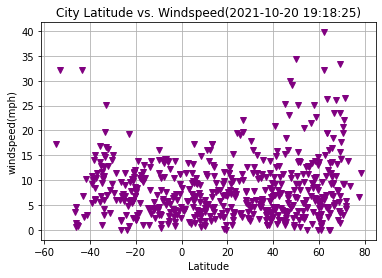

In [76]:
fig, ax = plt.subplots()
ax.plot(city_weather['lat'], city_weather['wind speed'], marker = 'v', color = "purple", linestyle = 'none')

ax.grid()
ax.set_xlabel('Latitude')
ax.set_ylabel('windspeed(mph)')
ax.set_title(f'City Latitude vs. Windspeed({converted_timestamp})')
plt.savefig('Latitude_Windspeed Plot')

plt.show()

#### Use the Seaborn library to re-create the above plots 

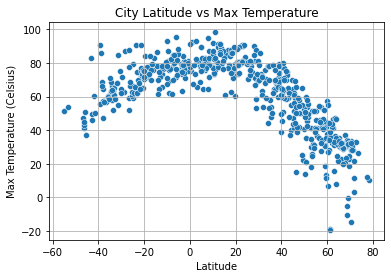

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
    
scatter_lat = city_weather["lat"]
scatter_temp = city_weather["max temperature"]
sns.scatterplot(x=scatter_lat,
                y=scatter_temp,
                data=city_weather)
    
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("City Latitude vs Max Temperature")
plt.show()

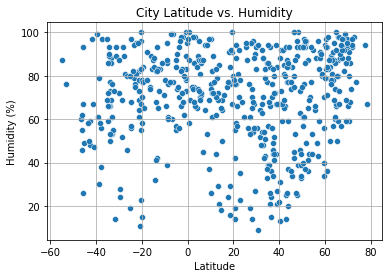

In [169]:
scatter_hum = city_weather["humidity"]
sns.scatterplot(x=scatter_lat,
                y=scatter_hum,
                data=city_weather)
    
    
plt.grid(True)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Latitude_Humidity Plot')
plt.show()

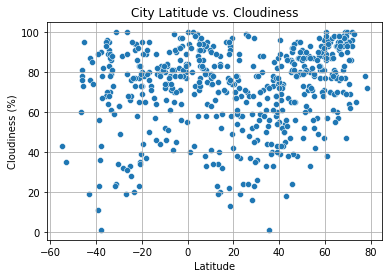

In [82]:
scatter_cloud = city_weather["cloudiness"]

sns.scatterplot(x=scatter_lat,
                y=scatter_hum,
                data=city_weather)

plt.grid(True)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Latitude_Cloudiness Plot')
plt.show()

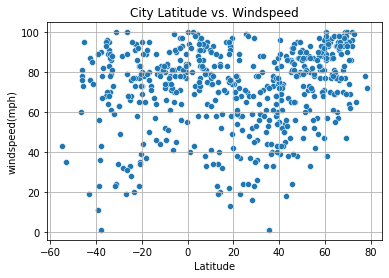

In [83]:
scatter_wind = city_weather["wind speed"]

sns.scatterplot(x=scatter_lat,
                y=scatter_hum,
                data=city_weather)

plt.grid(True)
plt.title('City Latitude vs. Windspeed')
plt.xlabel('Latitude')
plt.ylabel('windspeed(mph)')
plt.savefig('Latitude_Wind Speed Plot')
plt.show()

In [146]:
#Provide a written description of three observable trends based on the data

In [ ]:
# Temperatures are higher closer to the Equator (at 0° Latitude). It is also of worth to note that temperatures peak at 
# around -20° to -30° Latitude, and drop slightly further at -40° Latitude and below.
# There seems to be little to no correlation between humidity and Latitude as well as with cloudiness and Latitude.The 
# scatter plot visualizations display a considerable amount of heterogeneity even at similar Latitudes.

### Matplotlib

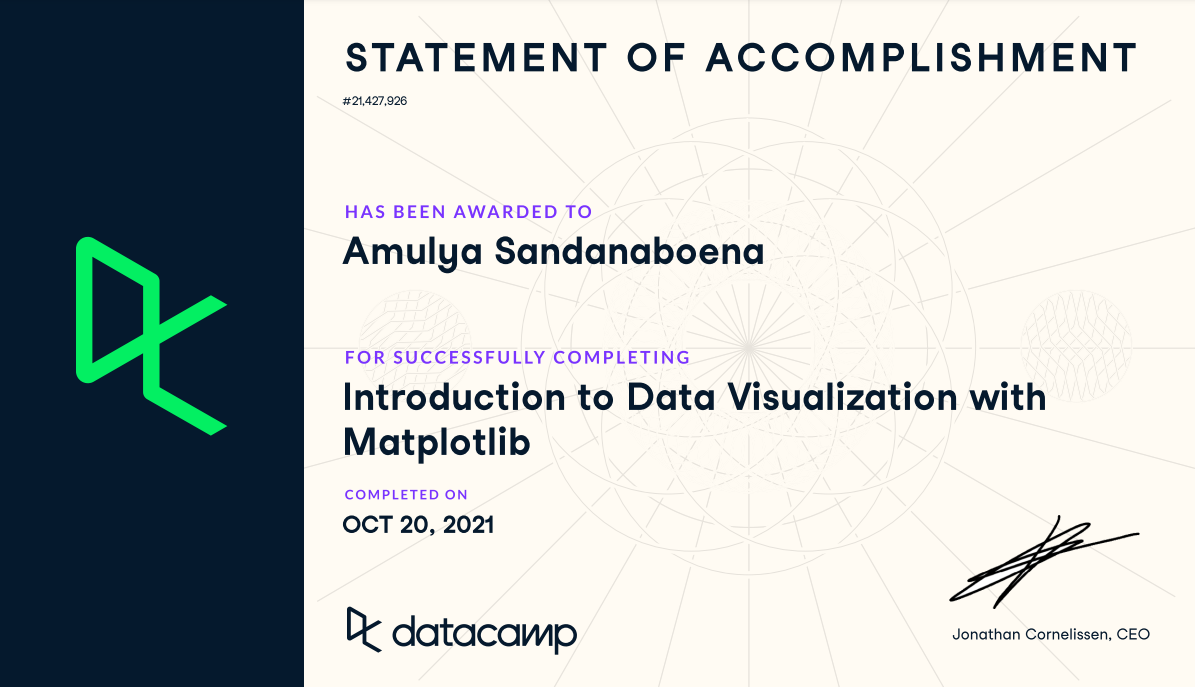

### Seaborn

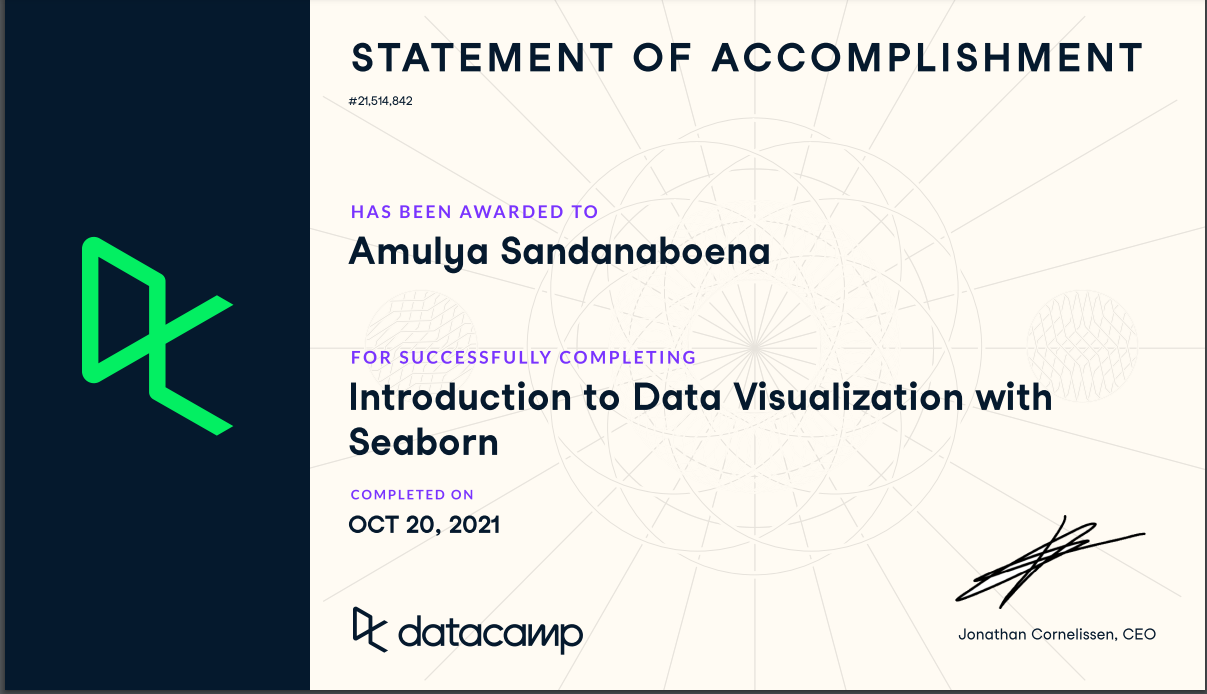